# Tensorflow Practice

This notebook contains our practice work in training a neural network to do binary classification.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import pandas
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt

Run this python file to generate all the datasets used:

In [2]:
%run -i 'build_simple_example.py'

In [3]:
# These tests are all binary classifiers, so the number of labels = 2
num_labels = 2

In [4]:
# Use the method to draw the image
def draw_image(x_data):
    x_0 = []
    x_1 = []
    y_0 = []
    y_1 = []

    for row in x_data:
        x = row[2]
        y = row[3]
        color = row[4]
        if color == 0:
            x_0.append(x)
            y_0.append(y)
        else:
            x_1.append(x)
            y_1.append(y)

    plt.scatter(x_0, y_0, c = "red")
    plt.scatter(x_1, y_1, c = "blue")

    plt.axis('equal')
    plt.show()

In [5]:
def generate_dataset(filename):
    col_names = ['ts','user','x_coordinate','y_coordinate','color', 'label']
    data = pandas.read_csv(filename, names = col_names, header=None, skiprows=1)

    return data

In [6]:
def extract_data(filename, num_labels):
    data = generate_dataset(filename)
    dim = data.ts.values.shape[0]
    dataset_x = np.concatenate((data.ts.values.reshape(dim,1),
                              data.user.values.reshape(dim,1),
                              data.x_coordinate.values.reshape(dim,1),
                              data.y_coordinate.values.reshape(dim,1),
                              data.color.values.reshape(dim,1)), axis=1)
    dataset_y = np.zeros((dim,num_labels))
    for i in range(dim):
        dataset_y[i][data.label.values[i]] = 1
    return dataset_x, dataset_y, dataset_x.shape[0]

In [7]:
def create_training_and_testing_sets(x_data, y_data, shape, num_test_points):
    test_indexes = random.sample(range(0, shape), num_test_points )


    train_indexes = np.setdiff1d(list(range(0,shape)),test_indexes)
    train_x = x_data[train_indexes]
    train_y = y_data[train_indexes]

    test_x = x_data[test_indexes]
    test_y = y_data[test_indexes]

    return train_x, train_y, test_x, test_y

In [8]:
def build_model():
    x = tf.placeholder(tf.float32, shape=(None, 5), name='x')    
    y = tf.placeholder(tf.float32, shape=(None, num_labels), name='y') 
    
    W1 = tf.Variable(tf.random_normal([5, 128], stddev = 0.01), name='W1')
    b1 = tf.Variable(tf.random_normal([128], stddev = 0.01), name='b1')
    
    W2 = tf.Variable(tf.random_normal([128, num_labels], stddev=0.01), name='W2')
    b2 = tf.Variable(tf.random_normal([num_labels], stddev = 0.01), name='b2')

    
    hidden_out = tf.add(tf.matmul(x, W1), b1)
    hidden_out = tf.nn.relu(hidden_out)
    
    logits = tf.add(tf.matmul(hidden_out, W2), b2)
    prediction = tf.nn.softmax(logits)
    y_clipped = tf.clip_by_value(prediction, 1e-10, 0.9999999)
    
    loss = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped) + (1 - y) * tf.log(1 - y_clipped), axis=1))
    
    train_op = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(loss)
    init = tf.global_variables_initializer()

    correct_prediction = tf.equal(tf.argmax(prediction, 1, name="Argmax_Pred"), tf.argmax(y, 1, name="Y_Pred"), name="Correct_Pred")
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32, name="Cast_Corr_Pred"), name="Accuracy")
    
    return x, y, init, train_op, loss, accuracy

In [9]:
def run(x, y, init, train_op, loss, accuracy, train_x, train_y, test_x, test_y):

    with tf.Session() as sess:
        sess.run(init)
        feed_dict = {x: train_x, y: train_y}
        test_dict = {x: test_x, y: test_y}
        
        error_increases = 0
        old_loss = 0
        for i in range(2000):
            #print('EPOCH', i)
            _, loss_val = sess.run([train_op, loss], feed_dict)
            
            if i % 1000 == 0:
                print("loss:", loss_val)

        print("Training Accuracy:", sess.run( accuracy, feed_dict))
        print("Testing Accuracy:", sess.run( accuracy, test_dict))

The first dataset tested is two solid colored blocks placed to the left and the right of each other. The image is 100x100 pixels.

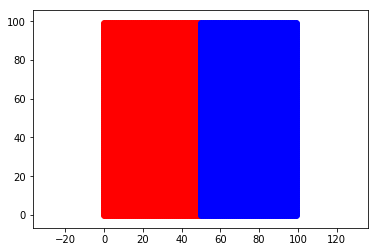

In [11]:
data_x, data_y, shape = extract_data('two_blocks_lr.txt', num_labels)

# Randomly take 9000 pixels to test on. The training set is only 1000
train_x, train_y, test_x, test_y = create_training_and_testing_sets(data_x, data_y, shape, 9000)
draw_image(data_x)

First, we trained and ran the data on the entire dataset, then tested on the entire dataset. We ran 2000 Epochs and printed the loss every 1000 epochs.
We did this 20 times.

In [12]:
for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, data_x, data_y, data_x, data_y)

Iteration:  0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
loss: 1.4072139
loss: 0.4047568
Training Accuracy: 0.9837
Testing Accuracy: 0.9837
Iteration:  1
loss: 1.3766823
loss: 0.41220653
Training Accuracy: 0.9071
Testing Accuracy: 0.9071
Iteration:  2
loss: 1.3936312
loss: 0.40244874
Training Accuracy: 0.9838
Testing Accuracy: 0.9838
Iteration:  3
loss: 1.3639764
loss: 0.40230453
Training Accuracy: 0.9837
Testing Accuracy: 0.9837
Iteration:  4
loss: 1.4046746
loss: 0.40421465
Training Accuracy: 0.9837
Testing Accuracy: 0.9837
Iteration:  5
loss: 1.3778
loss: 0.40325868
Training Accuracy: 0.9842
Testing Accuracy: 0.9842
Iteration:  6
loss: 1.4140978
loss: 0.41542226
Training Accuracy: 0.91
Testing Accuracy: 0.91
Iteration:  7
loss: 1.3722547
loss: 0.40968153
Training Accuracy: 0.9105
Testing Accuracy: 0.9105
Iteration:  8
loss: 1.38086
loss: 0.40977025
Training Accuracy: 0.9102
Testing Accuracy: 0.9102
Iteratio

Aftwards, we extracted 9000 datapoints for testing and trained on 1000

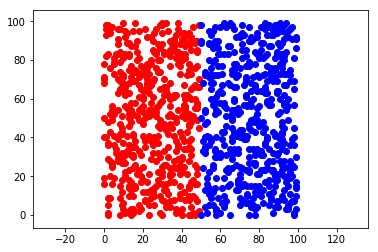

In [13]:
draw_image(train_x)

In [14]:
for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, train_x, train_y, test_x, test_y)

Iteration:  0
loss: 1.4159116
loss: 0.39862922
Training Accuracy: 0.911
Testing Accuracy: 0.917
Iteration:  1
loss: 1.3779237
loss: 0.3940402
Training Accuracy: 0.982
Testing Accuracy: 0.9778889
Iteration:  2
loss: 1.378389
loss: 0.39460242
Training Accuracy: 0.982
Testing Accuracy: 0.97744447
Iteration:  3
loss: 1.3789707
loss: 0.3935081
Training Accuracy: 0.982
Testing Accuracy: 0.9776667
Iteration:  4
loss: 1.4004109
loss: 0.40027794
Training Accuracy: 0.909
Testing Accuracy: 0.9161111
Iteration:  5
loss: 1.365199
loss: 0.39400104
Training Accuracy: 0.982
Testing Accuracy: 0.9761111
Iteration:  6
loss: 1.360635
loss: 0.392596
Training Accuracy: 0.982
Testing Accuracy: 0.978
Iteration:  7
loss: 1.3777261
loss: 0.39381084
Training Accuracy: 0.982
Testing Accuracy: 0.9773333
Iteration:  8
loss: 1.4058796
loss: 0.3987022
Training Accuracy: 0.908
Testing Accuracy: 0.9152222
Iteration:  9
loss: 1.37722
loss: 0.39268312
Training Accuracy: 0.986
Testing Accuracy: 0.98044443
Iteration:  10
l

Next we also tested with the two colors on top of each other and on two opposite sides of a diagonal.

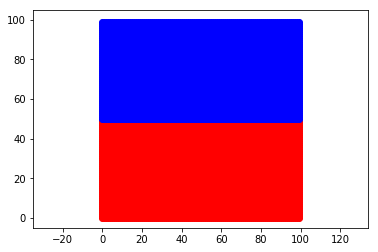

In [15]:
data_x, data_y, shape = extract_data('two_blocks_tb.txt', num_labels)

# Randomly take 9000 pixels to test on. The training set is only 1000
train_x, train_y, test_x, test_y = create_training_and_testing_sets(data_x, data_y, shape, 9000)
draw_image(data_x)

In [16]:
for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, data_x, data_y, data_x, data_y)

Iteration:  0
loss: 1.3759518
loss: 0.40943286
Training Accuracy: 0.9109
Testing Accuracy: 0.9109
Iteration:  1
loss: 1.4012954
loss: 0.4052122
Training Accuracy: 0.9841
Testing Accuracy: 0.9841
Iteration:  2
loss: 1.3643445
loss: 0.41513208
Training Accuracy: 0.9095
Testing Accuracy: 0.9095
Iteration:  3
loss: 1.3822191
loss: 0.4056404
Training Accuracy: 0.984
Testing Accuracy: 0.984
Iteration:  4
loss: 1.3952708
loss: 0.4036928
Training Accuracy: 0.9851
Testing Accuracy: 0.9851
Iteration:  5
loss: 1.3947557
loss: 0.40357408
Training Accuracy: 0.9841
Testing Accuracy: 0.9841
Iteration:  6
loss: 1.4056766
loss: 0.40380317
Training Accuracy: 0.9847
Testing Accuracy: 0.9847
Iteration:  7
loss: 1.3674237
loss: 0.41721475
Training Accuracy: 0.9114
Testing Accuracy: 0.9114
Iteration:  8
loss: 1.3716996
loss: 0.4031547
Training Accuracy: 0.985
Testing Accuracy: 0.985
Iteration:  9
loss: 1.3804631
loss: 0.40487382
Training Accuracy: 0.9836
Testing Accuracy: 0.9836
Iteration:  10
loss: 1.39212

Diagonal:

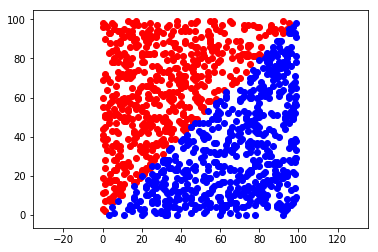

In [140]:
data_x, data_y, shape = extract_data('two_blocks_diag.txt', num_labels)

# Randomly take 9000 pixels to test on. The training set is only 1000
train_x, train_y, test_x, test_y = create_training_and_testing_sets(data_x, data_y, shape, 9000)
draw_image(train_x)

In [142]:
for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy,train_x, train_y, test_x, test_y )

Iteration:  0
loss: 1.3507522
loss: 0.060109925
Training Accuracy: 0.9881818
Testing Accuracy: 0.9892222
Iteration:  1
loss: 1.4207096
loss: 0.062251836
Training Accuracy: 0.9881818
Testing Accuracy: 0.9902222
Iteration:  2
loss: 1.3802321
loss: 0.05985636
Training Accuracy: 0.9881818
Testing Accuracy: 0.98933333
Iteration:  3
loss: 1.387581
loss: 0.059598334
Training Accuracy: 0.9881818
Testing Accuracy: 0.9892222
Iteration:  4
loss: 1.4081017
loss: 0.05959494
Training Accuracy: 0.9881818
Testing Accuracy: 0.9892222
Iteration:  5
loss: 1.3832333
loss: 0.05958324
Training Accuracy: 0.9881818
Testing Accuracy: 0.98933333
Iteration:  6
loss: 1.4039774
loss: 0.05968848
Training Accuracy: 0.9881818
Testing Accuracy: 0.9892222
Iteration:  7
loss: 1.3709445
loss: 0.06225088
Training Accuracy: 0.9881818
Testing Accuracy: 0.9901111
Iteration:  8
loss: 1.3997668
loss: 0.05988766
Training Accuracy: 0.9881818
Testing Accuracy: 0.9892222
Iteration:  9
loss: 1.3878275
loss: 0.062123545
Training Acc

We next tried a image where the number of red and blue dots was not the same.

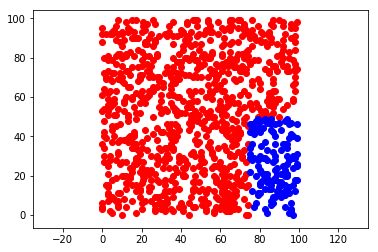

Iteration:  0
loss: 1.4364377
loss: 0.3499504
Training Accuracy: 0.926
Testing Accuracy: 0.9392222
Iteration:  1
loss: 1.3974874
loss: 0.35248014
Training Accuracy: 0.92
Testing Accuracy: 0.934
Iteration:  2
loss: 1.3516394
loss: 0.35091057
Training Accuracy: 0.962
Testing Accuracy: 0.9587778
Iteration:  3
loss: 1.414971
loss: 0.3482216
Training Accuracy: 0.922
Testing Accuracy: 0.9355556
Iteration:  4
loss: 1.4422592
loss: 0.35717916
Training Accuracy: 0.955
Testing Accuracy: 0.954
Iteration:  5
loss: 1.3439388
loss: 0.35328358
Training Accuracy: 0.921
Testing Accuracy: 0.93344444
Iteration:  6
loss: 1.2891791
loss: 0.35343868
Training Accuracy: 0.911
Testing Accuracy: 0.927
Iteration:  7
loss: 1.3131402
loss: 0.346944
Training Accuracy: 0.92
Testing Accuracy: 0.93277776
Iteration:  8
loss: 1.4034268
loss: 0.34569293
Training Accuracy: 0.958
Testing Accuracy: 0.9545556
Iteration:  9
loss: 1.4665034
loss: 0.34926686
Training Accuracy: 0.963
Testing Accuracy: 0.96
Iteration:  10
loss: 1

In [143]:
data_x, data_y, shape = extract_data('corner_color.txt', num_labels)

# Randomly take 9000 pixels to test on. The training set is only 1000
train_x, train_y, test_x, test_y = create_training_and_testing_sets(data_x, data_y, shape, 9000)
draw_image(train_x)

for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, train_x, train_y, test_x, test_y )

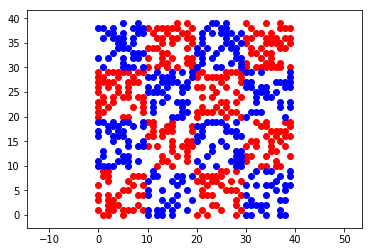

Iteration:  0
loss: 1.3874474
loss: 0.9931606
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  1
loss: 1.3888959
loss: 1.0548548
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  2
loss: 1.3910882
loss: 1.0633695
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  3
loss: 1.3840473
loss: 1.0516864
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  4
loss: 1.3901113
loss: 1.0023196
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  5
loss: 1.3884748
loss: 0.99569845
Training Accuracy: 0.96666664
Testing Accuracy: 0.974
Iteration:  6
loss: 1.3858262
loss: 1.0016807
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  7
loss: 1.3877584
loss: 0.9996063
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  8
loss: 1.3863953
loss: 1.0598629
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  9
loss: 1.3862959
loss: 1.0623719
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  10
loss: 1.3860385
loss: 1.041093
Training Accuracy: 1.0
Testing Acc

In [144]:
data_x, data_y, shape = extract_data('checkerboard_big.txt', num_labels)

# Randomly take 1000 pixels to test on. The training set is only 600
train_x, train_y, test_x, test_y = create_training_and_testing_sets(data_x, data_y, shape, 1000)
draw_image(train_x)

for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, train_x, train_y, test_x, test_y )

The checkerboard seems to be really easy and gets 100% accuracy almost all the time, even though it is more complicated than the other patterns.

We then tested a checkerboard that had gaps within it and it still had extremely good results.

800


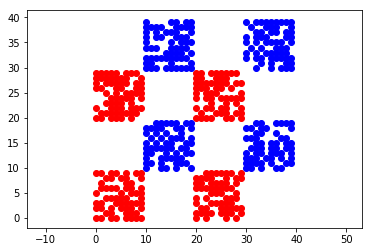

Iteration:  0
loss: 1.3904954
loss: 0.61919725
Training Accuracy: 0.986
Testing Accuracy: 0.99333334
Iteration:  1
loss: 1.388801
loss: 0.76798856
Training Accuracy: 0.848
Testing Accuracy: 0.85
Iteration:  2
loss: 1.38734
loss: 0.6191046
Training Accuracy: 0.986
Testing Accuracy: 0.99
Iteration:  3
loss: 1.3761032
loss: 0.78183377
Training Accuracy: 0.858
Testing Accuracy: 0.87333333
Iteration:  4
loss: 1.3865979
loss: 0.61821645
Training Accuracy: 0.986
Testing Accuracy: 0.99
Iteration:  5
loss: 1.3824471
loss: 0.6270792
Training Accuracy: 0.988
Testing Accuracy: 0.99333334
Iteration:  6
loss: 1.3797973
loss: 0.7810064
Training Accuracy: 0.86
Testing Accuracy: 0.87333333
Iteration:  7
loss: 1.3913155
loss: 0.6172248
Training Accuracy: 0.986
Testing Accuracy: 0.99
Iteration:  8
loss: 1.3870474
loss: 0.7721905
Training Accuracy: 0.86
Testing Accuracy: 0.87333333
Iteration:  9
loss: 1.3806859
loss: 0.61035556
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  10
loss: 1.3949951
lo

In [150]:
data_x, data_y, shape = extract_data('checkerboard_weird.txt', num_labels)
print(shape)
# Randomly take 300 pixels to test on. The training set is only 500
train_x, train_y, test_x, test_y = create_training_and_testing_sets(data_x, data_y, shape, 300 )
draw_image(train_x)

for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, train_x, train_y, test_x, test_y )

We tried one more time with a 50x50 square in the middle of a bunch of other points. 

10000


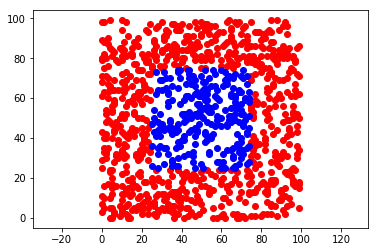

Iteration:  0
loss: 1.3794605
loss: 0.788454
Training Accuracy: 0.747
Testing Accuracy: 0.75
Iteration:  1
loss: 1.3079214
loss: 0.7872777
Training Accuracy: 0.838
Testing Accuracy: 0.83133334
Iteration:  2
loss: 1.357411
loss: 0.7915918
Training Accuracy: 0.8
Testing Accuracy: 0.7963333
Iteration:  3
loss: 1.3583866
loss: 0.77484614
Training Accuracy: 0.752
Testing Accuracy: 0.75211114
Iteration:  4
loss: 1.4622085
loss: 0.78643423
Training Accuracy: 0.757
Testing Accuracy: 0.7504445
Iteration:  5
loss: 1.3893291
loss: 0.78793126
Training Accuracy: 0.835
Testing Accuracy: 0.8411111
Iteration:  6
loss: 1.4189287
loss: 0.78662515
Training Accuracy: 0.78
Testing Accuracy: 0.7775556
Iteration:  7
loss: 1.443988
loss: 0.7870509
Training Accuracy: 0.763
Testing Accuracy: 0.75755554
Iteration:  8
loss: 1.4358174
loss: 0.78144544
Training Accuracy: 0.77
Testing Accuracy: 0.7593333
Iteration:  9
loss: 1.4395533
loss: 0.78867686
Training Accuracy: 0.758
Testing Accuracy: 0.7416667
Iteration:  1

In [154]:
data_x, data_y, shape = extract_data('block_in_middle.txt', num_labels)
print(shape)
# Randomly take 9000 pixels to test on. The training set is only 1000
train_x, train_y, test_x, test_y = create_training_and_testing_sets(data_x, data_y, shape, 9000 )
draw_image(train_x)

for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, train_x, train_y, test_x, test_y )

Our testing and training accuracy fluctuated a lot more and was always between 75% and 90%. Increasing the amount of training data points did not help.

10000


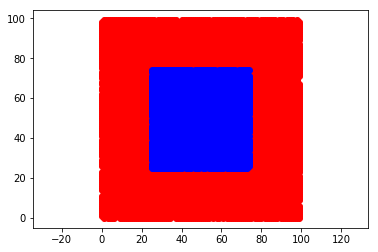

Iteration:  0
loss: 1.360924
loss: 0.78145355
Training Accuracy: 0.7454444
Testing Accuracy: 0.753
Iteration:  1
loss: 1.3741128
loss: 0.7755608
Training Accuracy: 0.7372222
Testing Accuracy: 0.709
Iteration:  2
loss: 1.4332099
loss: 0.7931153
Training Accuracy: 0.6957778
Testing Accuracy: 0.661
Iteration:  3
loss: 1.3581022
loss: 0.8134136
Training Accuracy: 0.74644446
Testing Accuracy: 0.717
Iteration:  4
loss: 1.47786
loss: 0.7795742
Training Accuracy: 0.7531111
Testing Accuracy: 0.762
Iteration:  5
loss: 1.4001898
loss: 0.7827902
Training Accuracy: 0.74255556
Testing Accuracy: 0.751
Iteration:  6
loss: 1.4217066
loss: 0.78119683
Training Accuracy: 0.7494444
Testing Accuracy: 0.758
Iteration:  7
loss: 1.4595163
loss: 0.7788615
Training Accuracy: 0.74855554
Testing Accuracy: 0.758
Iteration:  8
loss: 1.4630278
loss: 0.78272814
Training Accuracy: 0.757
Testing Accuracy: 0.729
Iteration:  9
loss: 1.4268222
loss: 0.78165525
Training Accuracy: 0.74733335
Testing Accuracy: 0.757
Iteration

In [155]:
data_x, data_y, shape = extract_data('block_in_middle.txt', num_labels)
print(shape)
# Randomly take 1000 pixels to test on. The training set is only 9000
train_x, train_y, test_x, test_y = create_training_and_testing_sets(data_x, data_y, shape, 1000 )
draw_image(train_x)

for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, train_x, train_y, test_x, test_y )

#TO DO#
When doing the real data, user id is kinda useless. You want to have a vector instead that is the embedding of the user, such as interactions of the user and information about the user. Maybe the top projects they participated in or their relation to other users.
TAke a small sample square of the data with a few pictures in it.
Read the paper and make it better
Clean and organize the notebook

If i given all the updates, how do i cluster them so that they form the images
EX: from 10000 updates, 100 images were built. Then i will train my model and be able to tell if it can perfectly find the images